### Problem  Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.


X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Step 1: Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows
pd.set_option('display.width', 1000)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm

# Step 2: Reading and Understanding the Data

In [2]:
Leads_df = pd.read_csv('Leads.csv')
Leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
Leads_df.shape

(9240, 37)

In [4]:
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
Leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 3: Data Cleaning

In [6]:
# Coverting the features in lower case:
Leads_df = Leads_df.applymap(lambda x: x.lower() if type(x)==str else x)

### Replace 'Select' with NAN

In [7]:
# Replacing 'Select' with NaN:
Leads_df = Leads_df.replace('select', np.nan)

### Drop Columns >40% missing values

In [8]:
null_values = round((Leads_df.isnull().mean()*100),2).sort_values(ascending=False)
null_values

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [9]:
# Dropping the columns which is having more than 40% null values
Leads_df.drop(null_values[null_values>40].index, axis=1, inplace=True)

In [10]:
round((Leads_df.isnull().mean()*100),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

### Check number of unique categories in all categorical columns

In [11]:
cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 
            'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 
            'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
            'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 
            'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 
            'A free copy of Mastering The Interview', 'Last Notable Activity', 'Converted', 
            'What matters most to you in choosing a course']

In [12]:
for i in cat_cols:
    print(round(Leads_df[i].value_counts(normalize=True)*100,2))
    print('-'*100)

landing page submission    52.88
api                        38.74
lead add form               7.77
lead import                 0.60
quick add form              0.01
Name: Lead Origin, dtype: float64
----------------------------------------------------------------------------------------------------
google               31.21
direct traffic       27.63
olark chat           19.07
organic search       12.54
reference             5.80
welingak website      1.54
referral sites        1.36
facebook              0.60
bing                  0.07
click2call            0.04
social media          0.02
live chat             0.02
press_release         0.02
pay per click ads     0.01
blog                  0.01
welearn               0.01
welearnblog_home      0.01
youtubechannel        0.01
testone               0.01
nc_edm                0.01
Name: Lead Source, dtype: float64
----------------------------------------------------------------------------------------------------
no     92.06
yes     7.94

In [13]:
#Dropping columns having variables 99% or more of single category 
drop_vars = ['I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content', 
            'Receive More Updates About Our Courses', 'Through Recommendations', 'Digital Advertisement', 'Newspaper', 
            'X Education Forums', 'Newspaper Article', 'Magazine', 'Search', 'Do Not Call', 'Country', 
             'What matters most to you in choosing a course']
Leads_df.drop(drop_vars, axis=1, inplace=True)

In [14]:
# Replacing variables with less than 1% count by 'other'
Leads_df['Lead Origin'] = Leads_df['Lead Origin'].apply(lambda x: 'other' if x in (['lead import', 'quick add form']) else x)
Leads_df['Lead Origin'].value_counts()

landing page submission    4886
api                        3580
lead add form               718
other                        56
Name: Lead Origin, dtype: int64

In [15]:
# Replacing variables with less than 1% count by 'other'
Leads_df['Lead Source'] = Leads_df['Lead Source'].apply(lambda x: 'other' if x in (['facebook', 'bing', 'click2call', 'social media', 'live chat', 'press_release', 'pay per click ads', 'blog', 'welearn', 'welearnblog_home', 'youtubechannel', 'testone', 'nc_edm']) else x)
Leads_df['Lead Source'].value_counts()

google              2873
direct traffic      2543
olark chat          1755
organic search      1154
reference            534
welingak website     142
referral sites       125
other                 78
Name: Lead Source, dtype: int64

In [16]:
# Replacing variables with less than 1% count by 'other'
Leads_df['Last Activity'] = Leads_df['Last Activity'].apply(lambda x: 'other' if x in (['unsubscribed', 'had a phone conversation', 'approached upfront', 'view in browser link clicked', 'email received', 'email marked spam', 'visited booth in tradeshow', 'resubscribed to emails']) else x)
Leads_df['Last Activity'].value_counts()

email opened                 3437
sms sent                     2745
olark chat conversation       973
page visited on website       640
converted to lead             428
email bounced                 326
email link clicked            267
form submitted on website     116
other                         112
unreachable                    93
Name: Last Activity, dtype: int64

In [17]:
# Replacing variables with less than 1% count by 'other'
Leads_df['Specialization'] = Leads_df['Specialization'].apply(lambda x: 'other' if x in (['e-business', 'services excellence']) else x)
Leads_df['Specialization'].value_counts()

finance management                   976
human resource management            848
marketing management                 838
operations management                503
business administration              403
it projects management               366
supply chain management              349
banking, investment and insurance    338
media and advertising                203
travel and tourism                   203
international business               178
healthcare management                159
hospitality management               114
e-commerce                           112
retail management                    100
other                                 97
rural and agribusiness                73
Name: Specialization, dtype: int64

In [18]:
# Replacing variables with less than 1% count by 'other'
Leads_df['What is your current occupation'] = Leads_df['What is your current occupation'].apply(lambda x: 'other' if ((x == 'housewife') or (x== 'businessman')) else x)
Leads_df['What is your current occupation'].value_counts(normalize=True)*100

unemployed              85.496183
working professional    10.778626
student                  3.206107
other                    0.519084
Name: What is your current occupation, dtype: float64

In [19]:
# Replacing variables with less than 1% count by 'other'
Leads_df['Tags'] = Leads_df['Tags'].apply(lambda x: 'other' if x in (['wrong number given', 'opp hangup', 'number not provided', 'in touch with eins', 'lost to others', 'still thinking', 'want to take admission but has financial problems', 'in confusion whether part time or dlp', 'interested in next batch', 'lateral student', 'shall take in the next coming month', 'university not recognized', 'recognition issue (dec approval)']) else x)
Leads_df['Tags'].value_counts()

will revert after reading the email    2072
ringing                                1203
interested in other courses             513
already a student                       465
closed by horizzon                      358
switched off                            240
busy                                    186
lost to eins                            175
other                                   156
not doing further education             145
interested  in full time mba            117
graduation in progress                  111
invalid number                           83
diploma holder (not eligible)            63
Name: Tags, dtype: int64

In [20]:
# Replacing variables with less than 1% count by 'other'
Leads_df['Last Notable Activity'] = Leads_df['Last Notable Activity'].apply(lambda x: 'other' if x in (['email bounced', 'unsubscribed', 'unreachable', 'had a phone conversation', 'email marked spam', 'approached upfront', 'resubscribed to emails', 'view in browser link clicked', 'form submitted on website',  'email received']) else x)
Leads_df['Last Notable Activity'].value_counts()

modified                   3407
email opened               2827
sms sent                   2172
page visited on website     318
olark chat conversation     183
email link clicked          173
other                       160
Name: Last Notable Activity, dtype: int64

In [21]:
Leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,0,0.0,0,0.0,page visited on website,NaN,unemployed,interested in other courses,NaN,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,0,5.0,674,2.5,email opened,NaN,unemployed,ringing,NaN,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,1,2.0,1532,2.0,email opened,business administration,student,will revert after reading the email,mumbai,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,0,1.0,305,1.0,unreachable,media and advertising,unemployed,ringing,mumbai,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,1,2.0,1428,1.0,converted to lead,NaN,unemployed,will revert after reading the email,mumbai,no,modified


In [22]:
cont_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 
            'Specialization', 'What is your current occupation', 'Tags', 'City', 
            'A free copy of Mastering The Interview', 'Last Notable Activity', 'Converted']
id_cols = ['Prospect ID', 'Lead Number']
print(len(cont_cols)+len(cat_cols)+len(id_cols))

16


In [23]:
for i in cat_cols:
    print(round(Leads_df[i].value_counts(normalize=True)*100,2))
    print('-'*100)

landing page submission    52.88
api                        38.74
lead add form               7.77
other                       0.61
Name: Lead Origin, dtype: float64
----------------------------------------------------------------------------------------------------
google              31.21
direct traffic      27.63
olark chat          19.07
organic search      12.54
reference            5.80
welingak website     1.54
referral sites       1.36
other                0.85
Name: Lead Source, dtype: float64
----------------------------------------------------------------------------------------------------
no     92.06
yes     7.94
Name: Do Not Email, dtype: float64
----------------------------------------------------------------------------------------------------
email opened                 37.62
sms sent                     30.04
olark chat conversation      10.65
page visited on website       7.00
converted to lead             4.68
email bounced                 3.57
email link clicked

In [24]:
round((Leads_df.isnull().mean()*100),2).sort_values(ascending=False)

City                                      39.71
Specialization                            36.58
Tags                                      36.29
What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [25]:
# Drop id Columns
Leads_df = Leads_df.drop(id_cols, axis=1)

# Step 4: Exploratory Data Analysis

## Univariate Analysis

In [26]:
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  Tags                                    5887 non-null   obje

Boxplot for:  TotalVisits


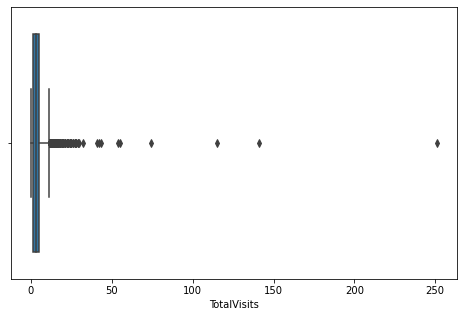

Boxplot for:  Total Time Spent on Website


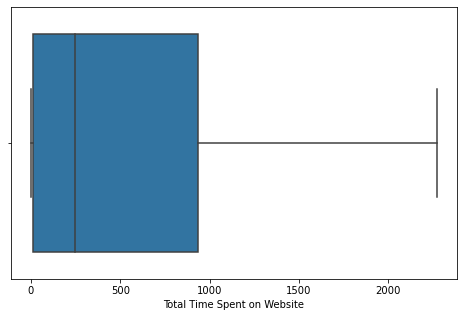

Boxplot for:  Page Views Per Visit


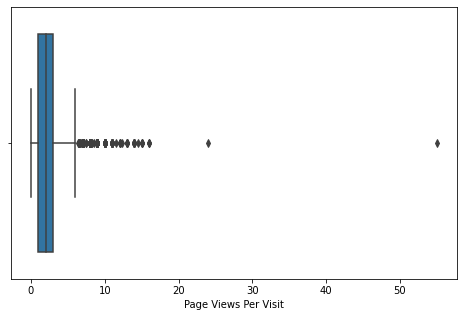

In [27]:
# For Continuous Variables
for i in cont_cols:
    plt.figure(figsize=(8,5))
    print('Boxplot for: ',i)
    sns.boxplot(Leads_df[i])
    plt.show()

In [28]:
Leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


Insights
- Leads visits on an average nearly 3 times the website.
- Leads spends on an avearge nearly 500 mins (in total) on the website.
- Leads view an average of nearly 2 pages on every visit.

Count Plot for : Lead Origin


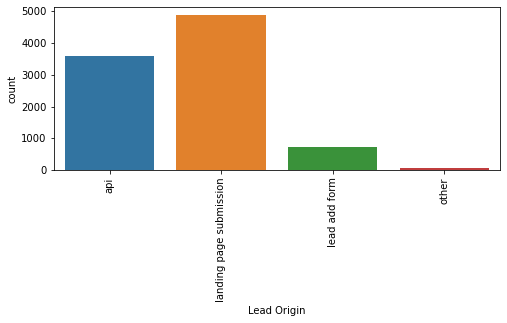

Count Plot for : Lead Source


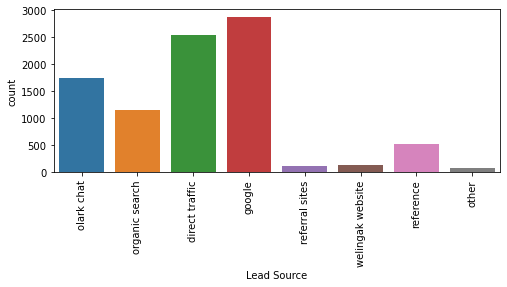

Count Plot for : Do Not Email


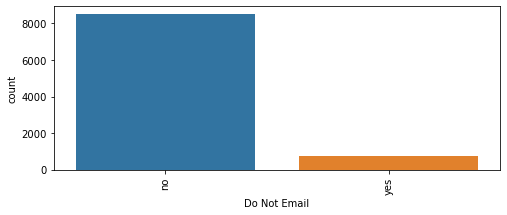

Count Plot for : Last Activity


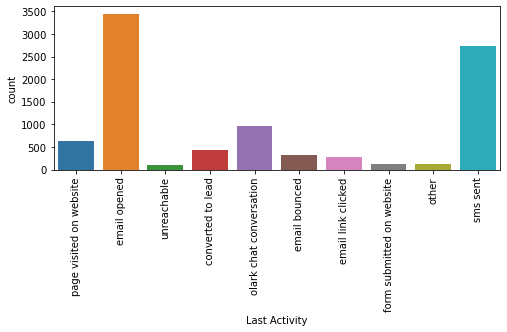

Count Plot for : Specialization


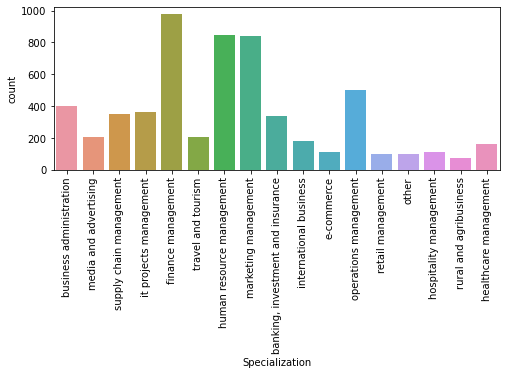

Count Plot for : What is your current occupation


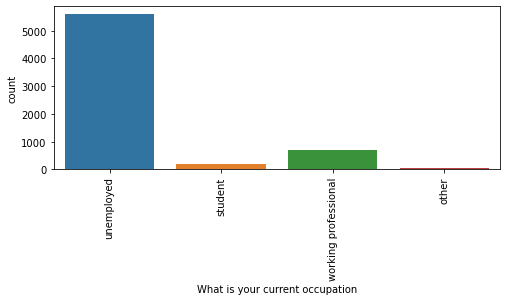

Count Plot for : Tags


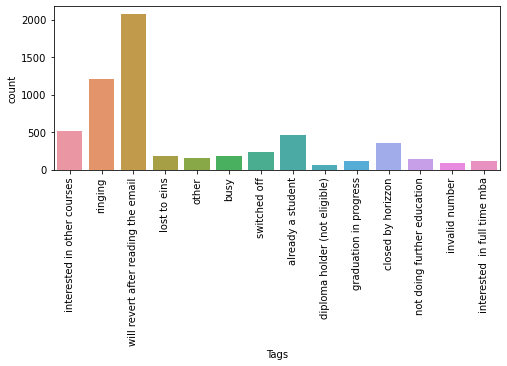

Count Plot for : City


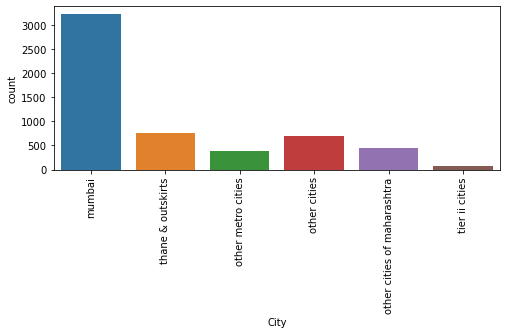

Count Plot for : A free copy of Mastering The Interview


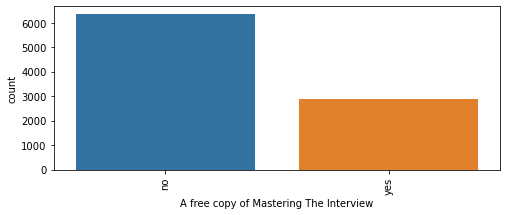

Count Plot for : Last Notable Activity


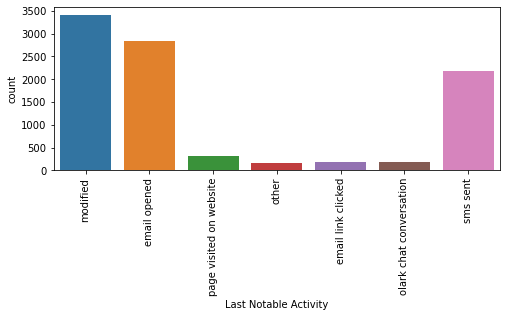

Count Plot for : Converted


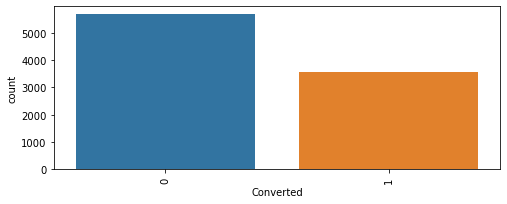

In [29]:
# For Categorical variables
for i in cat_cols:
    plt.figure(figsize=(8,3))
    print('Count Plot for :', i)
    sns.countplot(Leads_df[i])
    plt.xticks(rotation=90)
    plt.show()

#### Insights
- Most of the Lead origin is from 'Landing Page Submission' followed by 'API' and 'Lead Add form'.
- The large source of Lead is Google, followed by Direct Traffic and Olark Chat.
- Most of the Leads do not want to receive any mail.
- Most of the Leads opened mail, sent SMS and did olark chat conversation.
- Most of the customers are from Finance Management domain followed by Human Resource Management and Marketing Management domain.
- Most of the Leads are currently Unemployed.
- Most of the customer responded that they will revert after reading the mail.
- Most of the Leads are from Mumbai followed by Thane and outskirts.
- Most of the Leads don't want free copy of Mastering the Interview.
- Last notable activity of most of the Leads is that they done modification in their application.

### Bivariate Analysis

TotalVisits Vs Converted


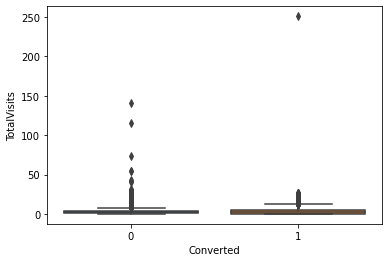

Total Time Spent on Website Vs Converted


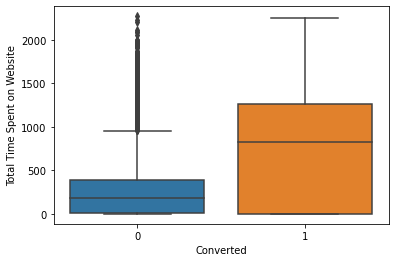

Page Views Per Visit Vs Converted


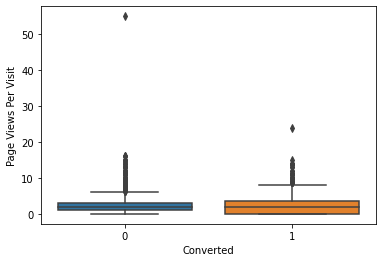

In [30]:
# Continuous variable Vs Target variable
for i in cont_cols:
    print(i, 'Vs Converted')
    sns.boxplot(x=Leads_df['Converted'], y=Leads_df[i])
    plt.show()

Insights
- Those Leads who visited more on the website and spent more time on the website have high chances to get converted.

Lead Origin Vs Converted


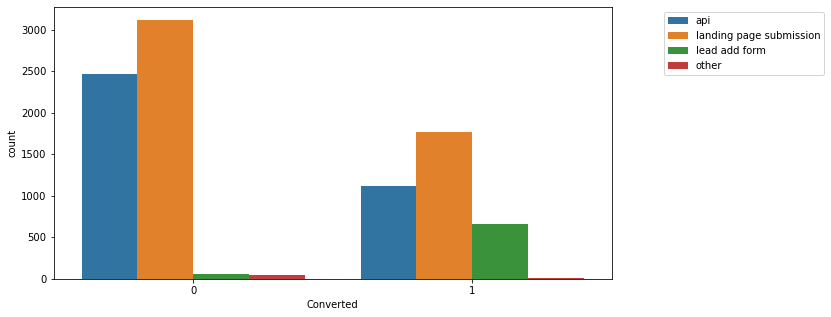

Lead Source Vs Converted


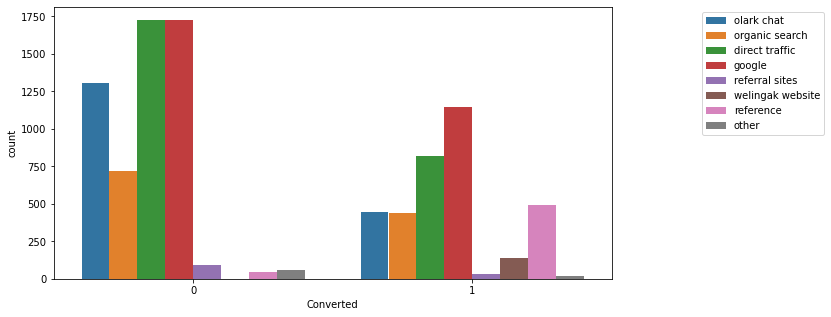

Do Not Email Vs Converted


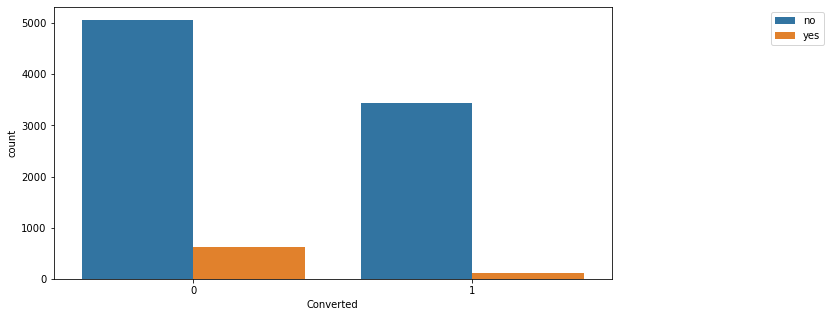

Last Activity Vs Converted


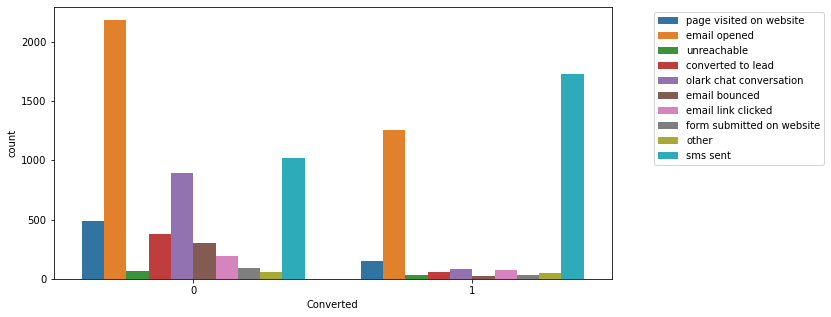

Specialization Vs Converted


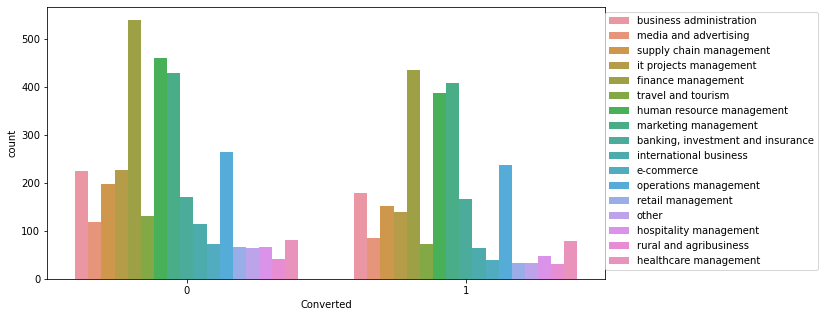

What is your current occupation Vs Converted


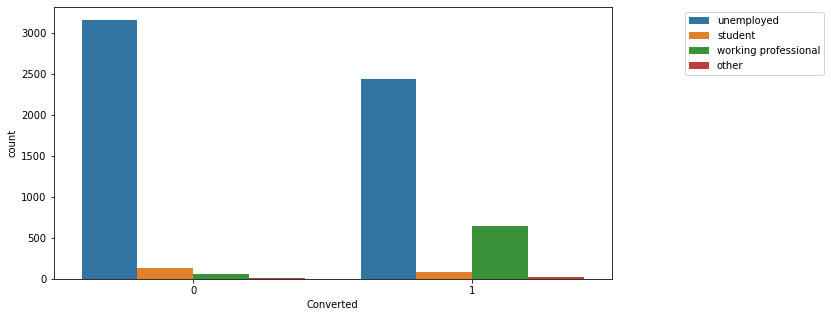

Tags Vs Converted


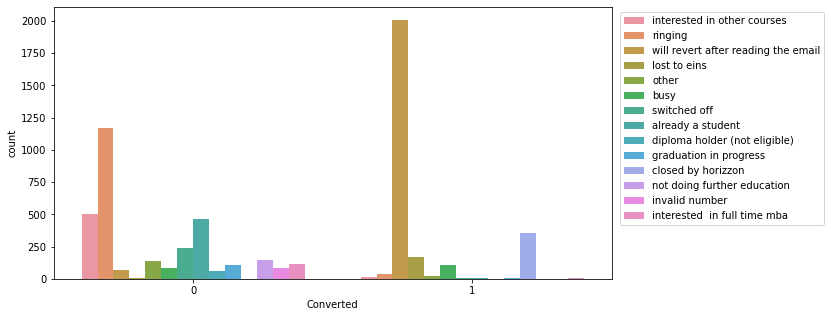

City Vs Converted


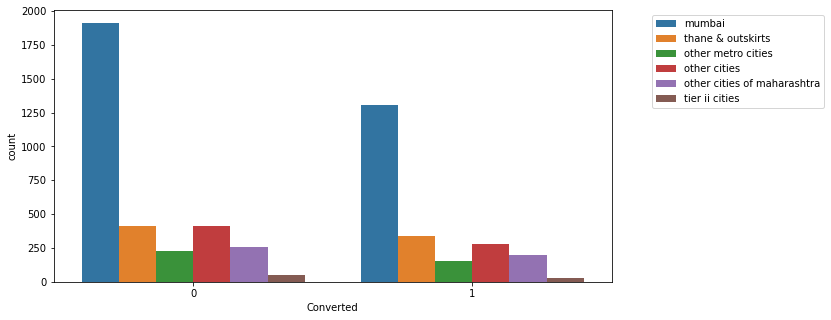

A free copy of Mastering The Interview Vs Converted


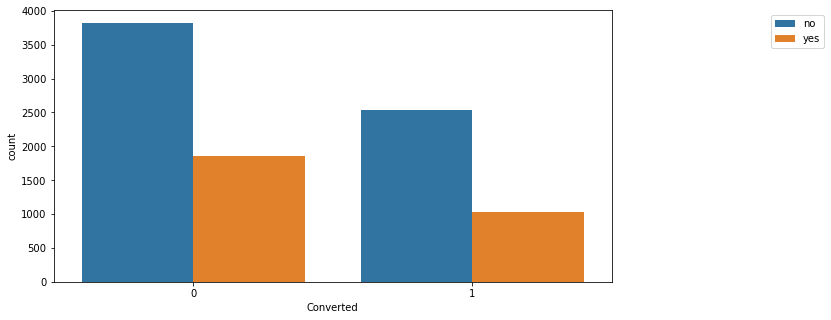

Last Notable Activity Vs Converted


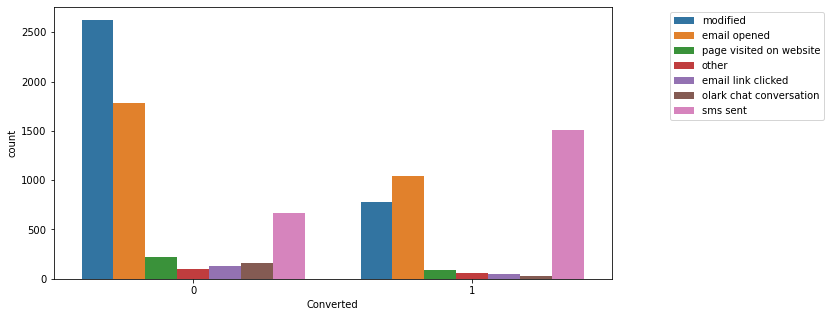

<Figure size 720x360 with 0 Axes>

In [31]:
# Categorical variables Vs Target variables
for i in cat_cols:
    plt.figure(figsize=(10,5))
    if i != 'Converted':
        print(i, 'Vs Converted')
        sns.countplot(Leads_df['Converted'], hue=Leads_df[i])
        plt.legend(bbox_to_anchor=(1.39,1.0))
        plt.show()

#### Insights:
- Both in Converted and potential Leads, most of the Leads are originated from 'Landing Page Submission' followed by 'API' and 'Lead Add form'.
- Google, Direct Traffic and Olark chat are the main sources of Leads, but the customers who sourced from Google get conveted most.
- Most of the converted and non-conveted customers do not opt to receive any mails.
- Leads last activity was that they opened email and sent SMS, but the one who sent SMS are converted most.
- Most of the converted and not converted Leads are from Finance Management domain.
- Most of the converted and not converted Leads are currently Unemployed.
- Most of the Leads who tagged as they will revert after reading the mail get conveted most.
- Most of the Leads are from Mumbai.
- Most of the Leads don't want free copy of Mastering the Interview.
- Most of the Leads who done modification in their application not get converted but the Leads who sent SMS get converted most.

### Multivariate Analysis

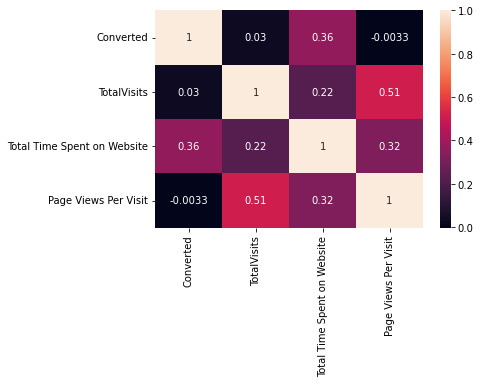

In [32]:
sns.heatmap(Leads_df.corr(), annot=True)
plt.show()

# Step 5: Data Pre-processing

In [33]:
Leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,0,0.0,0,0.0,page visited on website,NaN,unemployed,interested in other courses,NaN,no,modified
1,api,organic search,no,0,5.0,674,2.5,email opened,NaN,unemployed,ringing,NaN,no,email opened
2,landing page submission,direct traffic,no,1,2.0,1532,2.0,email opened,business administration,student,will revert after reading the email,mumbai,yes,email opened
3,landing page submission,direct traffic,no,0,1.0,305,1.0,unreachable,media and advertising,unemployed,ringing,mumbai,no,modified
4,landing page submission,google,no,1,2.0,1428,1.0,converted to lead,NaN,unemployed,will revert after reading the email,mumbai,no,modified


### Map Yes-No to 0's & 1's

In [34]:
#Replacing Yes-No with 1-0
y_n = ['Do Not Email', 'A free copy of Mastering The Interview']
for i in y_n:
    Leads_df[i] = Leads_df[i].map(lambda x: 1 if x=='Yes' else 0)

Leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,0,0,0.0,0,0.0,page visited on website,NaN,unemployed,interested in other courses,NaN,0,modified
1,api,organic search,0,0,5.0,674,2.5,email opened,NaN,unemployed,ringing,NaN,0,email opened
2,landing page submission,direct traffic,0,1,2.0,1532,2.0,email opened,business administration,student,will revert after reading the email,mumbai,0,email opened
3,landing page submission,direct traffic,0,0,1.0,305,1.0,unreachable,media and advertising,unemployed,ringing,mumbai,0,modified
4,landing page submission,google,0,1,2.0,1428,1.0,converted to lead,NaN,unemployed,will revert after reading the email,mumbai,0,modified


# Step 6: Data Preparation

### Train_Test Split

In [35]:
# Create X & y
y = Leads_df.pop('Converted')
X = Leads_df

In [36]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [37]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (6468, 13)
X_test shape (2772, 13)
y_train shape (6468,)
y_test shape (2772,)


### Missing Value Imputation

In [38]:
(round(X_train.isnull().mean()*100,2).sort_values(ascending=False))

City                                      40.00
Specialization                            36.75
Tags                                      36.27
What is your current occupation           29.27
TotalVisits                                1.53
Page Views Per Visit                       1.53
Last Activity                              1.14
Lead Source                                0.42
Lead Origin                                0.00
Do Not Email                               0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [39]:
cont_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 
            'Specialization', 'What is your current occupation', 'Tags', 'City', 
            'A free copy of Mastering The Interview', 'Last Notable Activity']

In [40]:
# Imputing Median values in place of missing values in X_train continuous variables
for i in cont_cols:
    X_train[i].fillna(X_train[i].median(), inplace=True)

In [41]:
# Imputing Mode values in place of missing values in  X_train categorical variables
for i in cat_cols:
    X_train[i].fillna(X_train[i].mode()[0], inplace=True)

In [42]:
(round(X_train.isnull().mean()*100,2).sort_values(ascending=False))

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [43]:
# Imputing Median values in place of missing values in X_test continuous variables
for i in cont_cols:
    X_test[i].fillna(X_test[i].median(), inplace=True)

In [44]:
# Imputing Mode values in place of missing values in X_test categorical variables
for i in cat_cols:
    X_test[i].fillna(X_test[i].mode()[0], inplace=True)

In [45]:
(round(X_test.isnull().mean()*100,2).sort_values(ascending=False))

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

### Outlier Treatment

In [46]:
for col in cont_cols:
    q1 = X_train[col].describe()['25%']
    q3 = X_train[col].describe()['75%']
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    X_train[col] = np.where(X_train[col]>upper_bound, upper_bound, X_train[col]) #capping
    X_train[col] = np.where(X_train[col]<lower_bound, lower_bound, X_train[col]) #flooring

In [47]:
for col in cont_cols:
    q1 = X_test[col].describe()['25%']
    q3 = X_test[col].describe()['75%']
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    X_test[col] = np.where(X_test[col]>upper_bound, upper_bound, X_test[col]) #capping
    X_test[col] = np.where(X_test[col]<lower_bound, lower_bound, X_test[col]) #flooring

### Dummy Variable creation

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6468 non-null   object 
 1   Lead Source                             6468 non-null   object 
 2   Do Not Email                            6468 non-null   int64  
 3   TotalVisits                             6468 non-null   float64
 4   Total Time Spent on Website             6468 non-null   float64
 5   Page Views Per Visit                    6468 non-null   float64
 6   Last Activity                           6468 non-null   object 
 7   Specialization                          6468 non-null   object 
 8   What is your current occupation         6468 non-null   object 
 9   Tags                                    6468 non-null   object 
 10  City                                    6468 non-null   o

In [49]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             2772 non-null   object 
 1   Lead Source                             2772 non-null   object 
 2   Do Not Email                            2772 non-null   int64  
 3   TotalVisits                             2772 non-null   float64
 4   Total Time Spent on Website             2772 non-null   float64
 5   Page Views Per Visit                    2772 non-null   float64
 6   Last Activity                           2772 non-null   object 
 7   Specialization                          2772 non-null   object 
 8   What is your current occupation         2772 non-null   object 
 9   Tags                                    2772 non-null   object 
 10  City                                    2772 non-null   o

In [50]:
X_train.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
1871,api,olark chat,0,0.0,0.0,0.00,email opened,marketing management,unemployed,ringing,mumbai,0,email opened
6795,landing page submission,direct traffic,0,4.0,487.0,1.33,email opened,finance management,unemployed,will revert after reading the email,other cities,0,email opened
3516,api,olark chat,0,5.0,106.0,2.50,email opened,finance management,unemployed,ringing,mumbai,0,email opened
8105,landing page submission,google,0,5.0,1230.0,5.00,sms sent,other,unemployed,ringing,mumbai,0,sms sent
3934,api,olark chat,0,0.0,0.0,0.00,email opened,finance management,unemployed,will revert after reading the email,mumbai,0,modified


In [51]:
dum = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'Last Notable Activity']

In [52]:
dummy_train = pd.get_dummies(X_train[dum], drop_first=True)
X_train = X_train.drop(dum, axis=1)
X_train = pd.concat([X_train, dummy_train],axis=1)
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_other,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_other,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_other,Last Activity_page visited on website,Last Activity_sms sent,Last Activity_unreachable,Specialization_business administration,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_other,Specialization_retail management,Specialization_rural and agribusiness,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Tags_busy,Tags_closed by horizzon,Tags_diploma holder (not eligible),Tags_graduation in progress,Tags_interested in full time mba,Tags_interested in other courses,Tags_invalid number,Tags_lost to eins,Tags_not doing further education,Tags_other,Tags_ringing,Tags_switched off,Tags_will revert after reading the email,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_other,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
1871,0,0.0,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
6795,0,4.0,487.0,1.33,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
3516,0,5.0,106.0,2.50,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
8105,0,5.0,1230.0,5.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3934,0,0.0,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [53]:
dummy_test = pd.get_dummies(X_test[dum], drop_first=True)
X_test = X_test.drop(dum, axis=1)
X_test = pd.concat([X_test, dummy_test],axis=1)
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_other,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_other,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_other,Last Activity_page visited on website,Last Activity_sms sent,Last Activity_unreachable,Specialization_business administration,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_other,Specialization_retail management,Specialization_rural and agribusiness,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Tags_busy,Tags_closed by horizzon,Tags_diploma holder (not eligible),Tags_graduation in progress,Tags_interested in full time mba,Tags_interested in other courses,Tags_invalid number,Tags_lost to eins,Tags_not doing further education,Tags_other,Tags_ringing,Tags_switched off,Tags_will revert after reading the email,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_other,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
4269,0,8.0,1011.0,7.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2376,0,0.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
7766,0,5.0,59.0,5.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
9199,0,0.0,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4359,0,0.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0


### Scaling the Numerical Features

In [54]:
scaler = MinMaxScaler()
X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])
X_test[cont_cols] = scaler.transform(X_test[cont_cols])

In [55]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_other,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_other,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_other,Last Activity_page visited on website,Last Activity_sms sent,Last Activity_unreachable,Specialization_business administration,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_other,Specialization_retail management,Specialization_rural and agribusiness,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Tags_busy,Tags_closed by horizzon,Tags_diploma holder (not eligible),Tags_graduation in progress,Tags_interested in full time mba,Tags_interested in other courses,Tags_invalid number,Tags_lost to eins,Tags_not doing further education,Tags_other,Tags_ringing,Tags_switched off,Tags_will revert after reading the email,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_other,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
count,6468.0,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.0,0.292025,0.212974,0.374255,0.0,0.528139,0.079468,0.005257,0.320810,0.190167,0.121058,0.007885,0.060297,0.014224,0.014069,0.036333,0.028293,0.381262,0.012678,0.102195,0.011905,0.072047,0.300402,0.008813,0.043599,0.012987,0.472944,0.015615,0.013451,0.091682,0.018707,0.037260,0.093383,0.020563,0.057205,0.010513,0.010823,0.007267,0.037570,0.021336,0.021027,0.897805,0.077613,0.019326,0.038188,0.007267,0.010359,0.012523,0.056895,0.009586,0.017316,0.016852,0.017625,0.130952,0.027984,0.584416,0.076376,0.049629,0.040816,0.079314,0.007885,0.305349,0.367811,0.018553,0.016543,0.035869,0.237477
std,0.0,0.260221,0.240566,0.295485,0.0,0.499246,0.270489,0.072318,0.466824,0.392463,0.326219,0.088453,0.238054,0.118422,0.117786,0.187131,0.165822,0.485734,0.111888,0.302929,0.108466,0.258586,0.458468,0.093468,0.204218,0.113227,0.499306,0.123991,0.115204,0.288599,0.135500,0.189414,0.290991,0.141926,0.232251,0.102002,0.103475,0.084940,0.190168,0.144512,0.143484,0.302929,0.267582,0.137678,0.191665,0.084940,0.101257,0.111213,0.231661,0.097444,0.130456,0.128727,0.131595,0.337374,0.164939,0.492861,0.265619,0.217194,0.197880,0.270248,0.088453,0.460591,0.482247,0.134950,0.127561,0.185978,0.425570
min,0.0,0.000000,0.

# Step 7: Modeling

### Features Selection

In [56]:
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=20)
selector.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [57]:
col_to_keep = X_train.columns[selector.support_]
col_to_keep

Index(['Total Time Spent on Website', 'Page Views Per Visit', 'Lead Origin_lead add form', 'Lead Source_welingak website', 'Last Activity_email bounced', 'Last Activity_sms sent', 'What is your current occupation_unemployed', 'What is your current occupation_working professional', 'Tags_busy', 'Tags_closed by horizzon', 'Tags_diploma holder (not eligible)', 'Tags_graduation in progress', 'Tags_invalid number', 'Tags_lost to eins', 'Tags_ringing', 'Tags_switched off', 'Tags_will revert after reading the email', 'Last Notable Activity_email opened', 'Last Notable Activity_other', 'Last Notable Activity_sms sent'], dtype='object')

In [58]:
X_train = X_train[col_to_keep]
X_train.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_lead add form,Lead Source_welingak website,Last Activity_email bounced,Last Activity_sms sent,What is your current occupation_unemployed,What is your current occupation_working professional,Tags_busy,Tags_closed by horizzon,Tags_diploma holder (not eligible),Tags_graduation in progress,Tags_invalid number,Tags_lost to eins,Tags_ringing,Tags_switched off,Tags_will revert after reading the email,Last Notable Activity_email opened,Last Notable Activity_other,Last Notable Activity_sms sent
1871,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
6795,0.214349,0.221667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
3516,0.046655,0.416667,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
8105,0.541373,0.833333,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3934,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [59]:
X_test = X_test[col_to_keep]
X_test.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_lead add form,Lead Source_welingak website,Last Activity_email bounced,Last Activity_sms sent,What is your current occupation_unemployed,What is your current occupation_working professional,Tags_busy,Tags_closed by horizzon,Tags_diploma holder (not eligible),Tags_graduation in progress,Tags_invalid number,Tags_lost to eins,Tags_ringing,Tags_switched off,Tags_will revert after reading the email,Last Notable Activity_email opened,Last Notable Activity_other,Last Notable Activity_sms sent
4269,0.444982,1.208333,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2376,0.000000,0.000000,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1
7766,0.025968,0.833333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
9199,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4359,0.000000,0.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0


### Model Building

#### Model 1

In [60]:
X_train_sm = sm.add_constant(X_train, has_constant='add')
X_test_sm = sm.add_constant(X_test, has_constant='add')

In [61]:
model1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1740.6
Date:                Tue, 15 Nov 2022   Deviance:                       3481.3
Time:                        20:05:48   Pearson chi2:                 1.18e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.5641      0.357    -12.768      0.000      -5.265      -3.863
Total Time Spent on Website                              4.5231      0.204     22.193      0.000       4.124       4.923
Page Views Per Visit                                    -0.6159      0.164     -3.746      0.000      -0.938      -0.294
Lead Origin_lead add form                                2.8506      0.250     11.390      0.000       2.360       3.341
Lead Source_welingak website                             1.4520      0.769      1.888      0.059      -0.055       2.959
Last Activity_email bounced                             -1.7260      0.348     -4.954      0.000      -2.409      -1.043
Last Activity_sms sent                                   0.8878      0.170      5.210      0.000       0.554       1.222
What is your current occupation_unemployed              -1.2192      0.315     -3.870      0.000      -1.837      -0.602
What is your current occupation_working professional     1.6638      0.394      4.222      0.000       0.891       2.436
Tags_busy                                                2.7287      0.309      8.839      0.000       2.124       3.334
Tags_closed by horizzon                                  8.9873      1.037      8.667      0.000       6.955      11.020
Tags_diploma holder (not eligible)                     -21.5049   1.59e+04     -0.001      0.999   -3.12e+04    3.11e+04
Tags_graduation in progress                              1.7624      0.561      3.142      0.002       0.663       2.862
Tags_invalid number                                     -1.9451      1.203     -1.617      0.106      -4.302       0.412
Tags_lost to eins                                        8.3958      0.760     11.049      0.000       6.906       9.885
Tags_ringing                                            -1.4631      0.311     -4.703      0.000      -2.073      -0.853
Tags_switched off                                       -1.4783      0.567     -2.606      0.009      -2.590      -0.366
Tags_will revert after reading the email                 3.4019      0.214     15.863      0.000       2.982       3.822
Last Notable Activity_email opened                       1.3697      0.110     12.500      0.000       1.155       1.584
Last Notable Activity_other                              2.1025      0.308      6.829      0.000       1.499       2.706
Last Notable Activity_sms sent                           2.5554      0.181     14.137      0.000       2.201       2.910
========================================================================================================================
"""

In [62]:
X_train_sm.drop('Tags_diploma holder (not eligible)', axis=1, inplace=True)
X_test_sm.drop('Tags_diploma holder (not eligible)', axis=1, inplace=True)

#### Model 2

In [63]:
model2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1742.9
Date:                Tue, 15 Nov 2022   Deviance:                       3485.7
Time:                        20:05:49   Pearson chi2:                 1.18e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.6058      0.360    -12.807      0.000      -5.311      -3.901
Total Time Spent on Website                              4.5126      0.203     22.181      0.000       4.114       4.911
Page Views Per Visit                                    -0.6165      0.164     -3.751      0.000      -0.939      -0.294
Lead Origin_lead add form                                2.8547      0.251     11.392      0.000       2.364       3.346
Lead Source_welingak website                             1.4449      0.769      1.879      0.060      -0.062       2.952
Last Activity_email bounced                             -1.7256      0.348     -4.954      0.000      -2.408      -1.043
Last Activity_sms sent                                   0.8870      0.170      5.210      0.000       0.553       1.221
What is your current occupation_unemployed              -1.2407      0.317     -3.919      0.000      -1.861      -0.620
What is your current occupation_working professional     1.6143      0.393      4.103      0.000       0.843       2.386
Tags_busy                                                2.7957      0.309      9.059      0.000       2.191       3.401
Tags_closed by horizzon                                  9.0528      1.037      8.730      0.000       7.020      11.085
Tags_graduation in progress                              1.8301      0.561      3.264      0.001       0.731       2.929
Tags_invalid number                                     -1.8768      1.202     -1.562      0.118      -4.232       0.478
Tags_lost to eins                                        8.4612      0.760     11.135      0.000       6.972       9.951
Tags_ringing                                            -1.3960      0.311     -4.490      0.000      -2.005      -0.787
Tags_switched off                                       -1.4100      0.567     -2.486      0.013      -2.522      -0.298
Tags_will revert after reading the email                 3.4702      0.214     16.198      0.000       3.050       3.890
Last Notable Activity_email opened                       1.3640      0.109     12.465      0.000       1.150       1.579
Last Notable Activity_other                              2.1036      0.308      6.830      0.000       1.500       2.707
Last Notable Activity_sms sent                           2.5573      0.181     14.148      0.000       2.203       2.912
========================================================================================================================
"""

In [64]:
X_train_sm.drop('Tags_invalid number', axis=1, inplace=True)
X_test_sm.drop('Tags_invalid number', axis=1, inplace=True)

#### Model 3

In [65]:
model3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1744.6
Date:                Tue, 15 Nov 2022   Deviance:                       3489.2
Time:                        20:05:49   Pearson chi2:                 1.19e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.6736      0.362    -12.921      0.000      -5.383      -3.965
Total Time Spent on Website                              4.5148      0.203     22.190      0.000       4.116       4.914
Page Views Per Visit                                    -0.6211      0.164     -3.787      0.000      -0.943      -0.300
Lead Origin_lead add form                                2.8612      0.251     11.395      0.000       2.369       3.353
Lead Source_welingak website                             1.4377      0.769      1.869      0.062      -0.070       2.945
Last Activity_email bounced                             -1.7254      0.349     -4.951      0.000      -2.408      -1.042
Last Activity_sms sent                                   0.8878      0.170      5.210      0.000       0.554       1.222
What is your current occupation_unemployed              -1.2691      0.319     -3.981      0.000      -1.894      -0.644
What is your current occupation_working professional     1.6044      0.396      4.047      0.000       0.827       2.381
Tags_busy                                                2.9008      0.305      9.500      0.000       2.302       3.499
Tags_closed by horizzon                                  9.1491      1.036      8.827      0.000       7.118      11.181
Tags_graduation in progress                              1.9280      0.559      3.448      0.001       0.832       3.024
Tags_lost to eins                                        8.5581      0.759     11.274      0.000       7.070      10.046
Tags_ringing                                            -1.2870      0.307     -4.189      0.000      -1.889      -0.685
Tags_switched off                                       -1.3015      0.565     -2.303      0.021      -2.409      -0.194
Tags_will revert after reading the email                 3.5684      0.211     16.902      0.000       3.155       3.982
Last Notable Activity_email opened                       1.3658      0.110     12.465      0.000       1.151       1.581
Last Notable Activity_other                              2.0996      0.307      6.830      0.000       1.497       2.702
Last Notable Activity_sms sent                           2.5404      0.180     14.089      0.000       2.187       2.894
========================================================================================================================
"""

In [66]:
X_train_sm.drop('Lead Source_welingak website', axis=1, inplace=True)
X_test_sm.drop('Lead Source_welingak website', axis=1, inplace=True)

#### Model 4

In [67]:
model4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1747.0
Date:                Tue, 15 Nov 2022   Deviance:                       3494.1
Time:                        20:05:49   Pearson chi2:                 1.23e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.6956      0.364    -12.903      0.000      -5.409      -3.982
Total Time Spent on Website                              4.5205      0.204     22.185      0.000       4.121       4.920
Page Views Per Visit                                    -0.6243      0.164     -3.805      0.000      -0.946      -0.303
Lead Origin_lead add form                                3.0962      0.232     13.346      0.000       2.641       3.551
Last Activity_email bounced                             -1.7555      0.350     -5.022      0.000      -2.441      -1.070
Last Activity_sms sent                                   0.8921      0.170      5.252      0.000       0.559       1.225
What is your current occupation_unemployed              -1.2592      0.321     -3.921      0.000      -1.889      -0.630
What is your current occupation_working professional     1.6008      0.399      4.016      0.000       0.820       2.382
Tags_busy                                                2.9100      0.306      9.515      0.000       2.311       3.509
Tags_closed by horizzon                                  9.1496      1.037      8.824      0.000       7.117      11.182
Tags_graduation in progress                              1.9406      0.559      3.469      0.001       0.844       3.037
Tags_lost to eins                                        8.5710      0.759     11.287      0.000       7.083      10.059
Tags_ringing                                            -1.3097      0.309     -4.245      0.000      -1.914      -0.705
Tags_switched off                                       -1.2880      0.565     -2.278      0.023      -2.396      -0.180
Tags_will revert after reading the email                 3.5834      0.212     16.914      0.000       3.168       3.999
Last Notable Activity_email opened                       1.3653      0.109     12.480      0.000       1.151       1.580
Last Notable Activity_other                              2.1162      0.308      6.879      0.000       1.513       2.719
Last Notable Activity_sms sent                           2.5348      0.180     14.089      0.000       2.182       2.887
========================================================================================================================
"""

### Check the VIF

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,45.76
5,Last Activity_sms sent,4.05
7,What is your current occupation_working profes...,3.99
6,What is your current occupation_unemployed,3.93
17,Last Notable Activity_sms sent,3.78
14,Tags_will revert after reading the email,2.03
12,Tags_ringing,1.68
9,Tags_closed by horizzon,1.42
15,Last Notable Activity_email opened,1.39
3,Lead Origin_lead add form,1.35


 * Since, p-value of all the features are less than 0.05 and VIF is also less than 5. So, Model 5 will be our final model.

# Step 8: Model Evaluation

In [69]:
train_pred = result4.predict(X_train_sm)
train = pd.DataFrame(train_pred, columns=['Predicted_Probs'])
train['Actual'] = y_train
train['Predicted'] = np.where(train['Predicted_Probs']>0.5, 1, 0)
train

,Predicted_Probs,Actual,Predicted
1871,0.002734,0,0
6795,0.456228,0,0
3516,0.002603,0,0
8105,0.128916,0,0
3934,0.085376,0,0
...,...,...,...
350,0.889932,1,1
79,0.991669,1,1
8039,0.267741,1,0
6936,0.023003,0,0


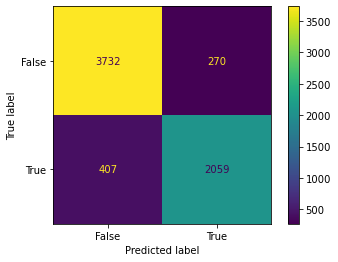

In [70]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(train['Actual'], train['Predicted'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()

In [71]:
print('Accuracy: ', round(100*metrics.accuracy_score(train['Actual'], train['Predicted']),2),'%')
print('Recall: ', round(100*metrics.recall_score(train['Actual'], train['Predicted']),2), '%')
print('Precision: ', round(100*metrics.precision_score(train['Actual'], train['Predicted']),2), '%')
print('F1 Score: ', round(100*metrics.f1_score(train['Actual'], train['Predicted']),2), '%')

Accuracy:  89.53 %
Recall:  83.5 %
Precision:  88.41 %
F1 Score:  85.88 %


### Plotting the ROC curve

In [72]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterstics example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

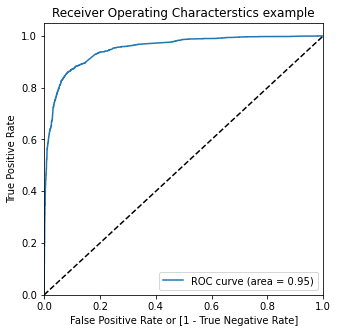

In [73]:
fpr, tpr, threshold = metrics.roc_curve(train['Actual'], train['Predicted_Probs'], drop_intermediate=False)
draw_roc(train['Actual'], train['Predicted_Probs'])

### Finding Optimal Cutoff Point
Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [74]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train[i] = train['Predicted_Probs'].map(lambda x: 1 if x>i else 0)
train.head()

,Predicted_Probs,Actual,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0.002734,0,0,1,0,0,0,0,0,0,0,0,0
6795,0.456228,0,0,1,1,1,1,1,0,0,0,0,0
3516,0.002603,0,0,1,0,0,0,0,0,0,0,0,0
8105,0.128916,0,0,1,1,0,0,0,0,0,0,0,0
3934,0.085376,0,0,1,0,0,0,0,0,0,0,0,0


In [75]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(train['Actual'], train[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.784477  0.965531  0.672914
0.2   0.2  0.835807  0.946067  0.767866
0.3   0.3  0.876933  0.890511  0.868566
0.4   0.4  0.893321  0.861314  0.913043
0.5   0.5  0.895331  0.834955  0.932534
0.6   0.6  0.890693  0.801298  0.945777
0.7   0.7  0.881262  0.752230  0.960770
0.8   0.8  0.847093  0.630576  0.980510
0.9   0.9  0.811688  0.519870  0.991504


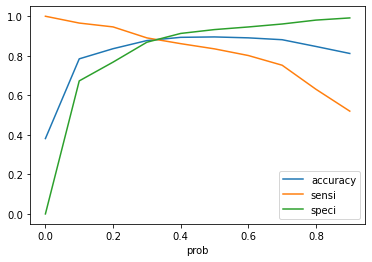

In [76]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Precision and Recall Tradeoff

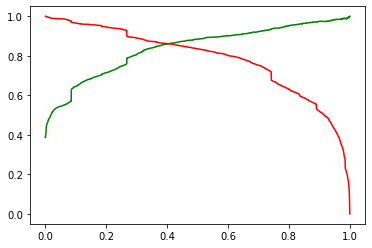

In [77]:
from sklearn.metrics import precision_recall_curve
p, r, threshold = precision_recall_curve(train['Actual'], train['Predicted_Probs'])
plt.plot(threshold, p[:-1], 'g')
plt.plot(threshold, r[:-1], 'r')
plt.show()

In [78]:
# Since, the cut-off point is coming 0.4, replace 0.5 cut-off to 0.4
train = pd.DataFrame(train_pred, columns=['Predicted_Probs'])
train['Actual'] = y_train
train['Predicted'] = np.where(train['Predicted_Probs']>0.4, 1, 0)


In [79]:
print('Accuracy: ', round(100*metrics.accuracy_score(train['Actual'], train['Predicted']),2),'%')
print('Recall: ', round(100*metrics.recall_score(train['Actual'], train['Predicted']),2), '%')
print('Precision: ', round(100*metrics.precision_score(train['Actual'], train['Predicted']),2), '%')
print('F1 Score: ', round(100*metrics.f1_score(train['Actual'], train['Predicted']),2), '%')

Accuracy:  89.33 %
Recall:  86.13 %
Precision:  85.92 %
F1 Score:  86.03 %


### Applying on Test set

In [80]:
test_pred = result4.predict(X_test_sm)
test = pd.DataFrame(test_pred, columns=['Predicted_Probs'])
test['Actual'] = y_test
test['Predicted'] = np.where(test['Predicted_Probs']>0.4, 1, 0)
test

,Predicted_Probs,Actual,Predicted
4269,0.909923,1,1
2376,0.984505,1,1
7766,0.900431,1,1
9199,0.002586,0,0
4359,0.889932,1,1
...,...,...,...
8649,0.124497,0,0
2152,0.984505,1,1
7101,0.010056,0,0
5331,0.626156,0,1


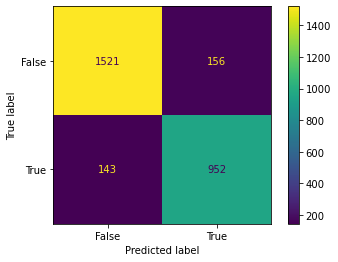

In [81]:
confusion_matrix = metrics.confusion_matrix(test['Actual'], test['Predicted'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()

In [82]:
print('Accuracy: ', round(100*metrics.accuracy_score(test['Actual'], test['Predicted']),2),'%')
print('Recall: ', round(100*metrics.recall_score(test['Actual'], test['Predicted']),2), '%')
print('Precision: ', round(100*metrics.precision_score(test['Actual'], test['Predicted']),2), '%')
print('F1 Score: ', round(100*metrics.f1_score(test['Actual'], test['Predicted']),2), '%')

Accuracy:  89.21 %
Recall:  86.94 %
Precision:  85.92 %
F1 Score:  86.43 %


# Step 9: Calculate 'Score'

In [83]:
train['Score'] = round(train['Predicted_Probs'] * 100,1)
train.sort_values(by='Score', ascending=False)

,Predicted_Probs,Actual,Predicted,Score
5806,0.999922,1,1,100.0
112,0.999894,1,1,100.0
6380,0.999912,1,1,100.0
392,0.999942,1,1,100.0
2925,0.999783,1,1,100.0
...,...,...,...,...
469,0.000444,0,0,0.0
3309,0.000438,0,0,0.0
9013,0.000435,0,0,0.0
626,0.000104,0,0,0.0


In [84]:
test['Score'] = round(test['Predicted_Probs'] * 100,1)
test.sort_values(by='Score', ascending=False)

,Predicted_Probs,Actual,Predicted,Score
3424,0.999893,1,1,100.0
4444,0.999527,1,1,100.0
6017,0.999742,1,1,100.0
7691,0.999867,1,1,100.0
5921,0.999992,1,1,100.0
...,...,...,...,...
155,0.000112,0,0,0.0
9225,0.000422,0,0,0.0
201,0.000346,0,0,0.0
1505,0.000458,0,0,0.0
